Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


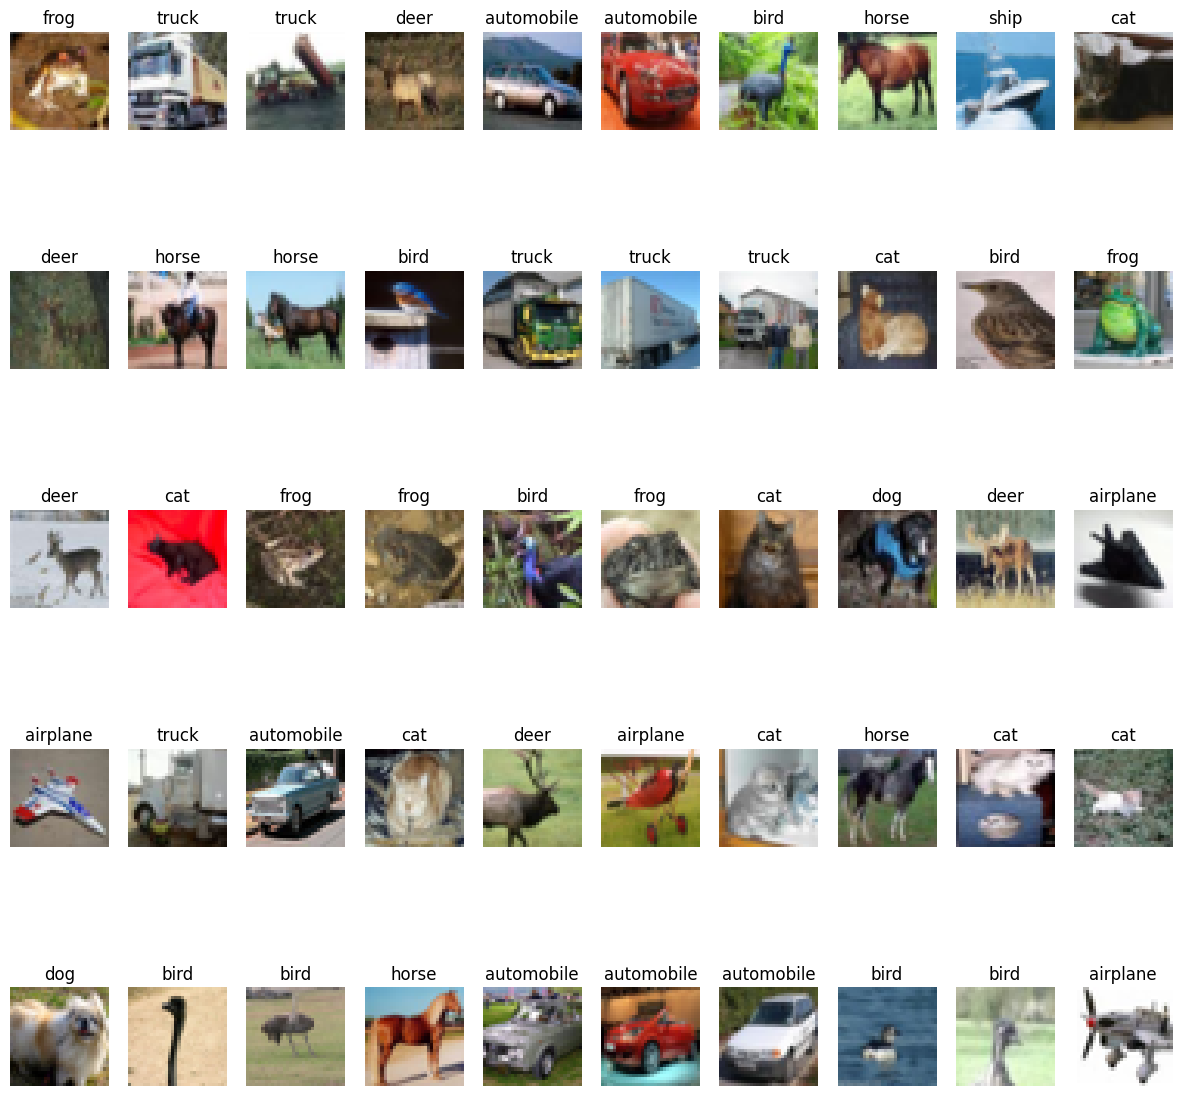

<Figure size 640x480 with 0 Axes>

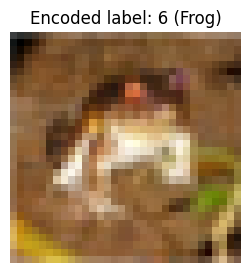

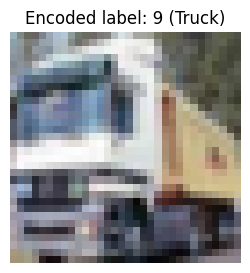

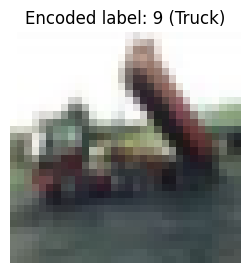

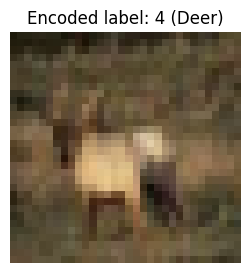

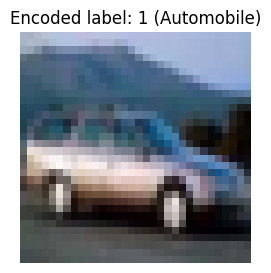

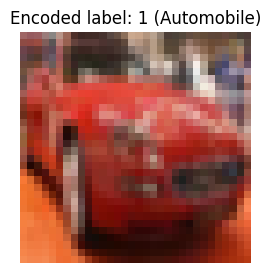

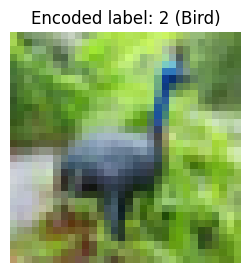

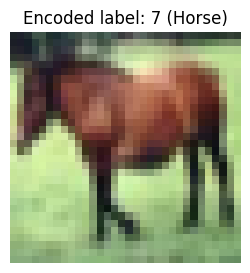

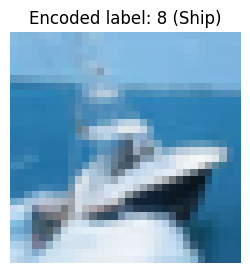

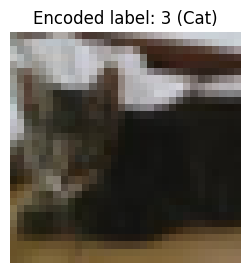

In [72]:
###importing modules, loading dataset, train-test split, one hot encoding and first visualization

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report



(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

print('Train: X=%s, y=%s' % (X_train.shape, Y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, Y_test.shape))

num_classes = 10
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)


class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']




plt.figure(figsize=(15, 15))
for i in range(50):
    plt.subplot(5, 10, i + 1)
    plt.imshow(X_train[i])
    plt.title(class_names[np.argmax(Y_train[i])])  
    plt.axis('off')
plt.show()

plt.tight_layout()

class_dict = {0: "Airplane", 1: "Automobile", 2: "Bird", 3: "Cat", 4: "Deer", 5: "Dog", 6: "Frog", 7: "Horse", 8: "Ship", 9: "Truck"}

num=10



for i in range(num):
    plt.figure(figsize=(3, 3))
    plt.imshow(X_train[i])
    plt.title(f"Encoded label: {Y_train[i].argmax()} ({class_dict[Y_train[i].argmax()]})")
    plt.axis('off')
    plt.show()




In [4]:
# data conversion and normalization
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0



X_train
X_test

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

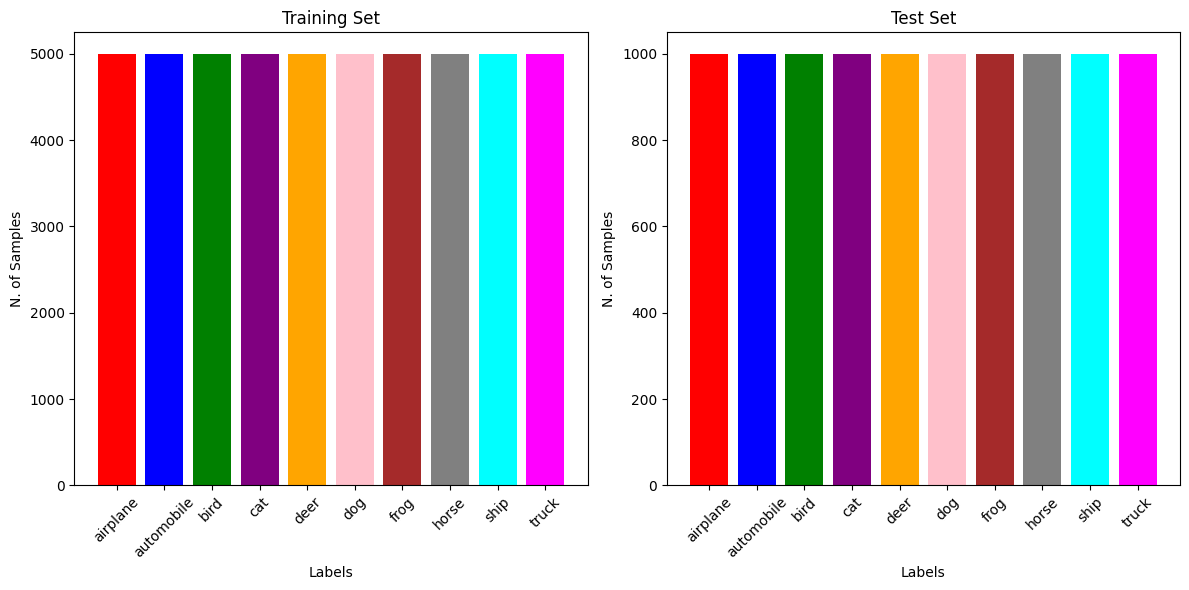

In [5]:
###data visualization of test and training samples (in order to avoid imbalance)

train_class_counts = np.sum(Y_train, axis=0)
test_class_counts = np.sum(Y_test, axis=0)

colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan', 'magenta']


train_class_counts = np.sum(Y_train, axis=0)
test_class_counts = np.sum(Y_test, axis=0)

###plotting test and training set 
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(range(num_classes), train_class_counts, color=colors)
plt.title('Training Set')
plt.xticks(range(num_classes), class_names, rotation=45)
plt.xlabel('Labels')
plt.ylabel('N. of Samples')


plt.subplot(1, 2, 2)
plt.bar(range(num_classes), test_class_counts, color=colors)
plt.title('Test Set')
plt.xticks(range(num_classes), class_names, rotation=45)
plt.xlabel('Labels')
plt.ylabel('N. of Samples')

plt.tight_layout()
plt.show()

In [6]:
###first model: one of the simplest (but too general) cnn model architecture

model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 128)               921728    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 923914 (3.52 MB)
Trainable params: 923914 (3.52 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

Epoch 1/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4843 - accuracy: 0.4716 - val_loss: 1.2112 - val_accuracy: 0.5686
Epoch 2/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1596 - accuracy: 0.5942 - val_loss: 1.2174 - val_accuracy: 0.5783
Epoch 3/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0332 - accuracy: 0.6414 - val_loss: 1.0730 - val_accuracy: 0.6235
Epoch 4/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9524 - accuracy: 0.6697 - val_loss: 1.0844 - val_accuracy: 0.6228
Epoch 5/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8869 - accuracy: 0.6921 - val_loss: 1.0708 - val_accuracy: 0.6267
Epoch 6/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8299 - accuracy: 0.7121 - val_loss: 1.0328 - val_accuracy: 0.6449
Epoch 7/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7779 - accuracy: 0.7286 - val_loss: 1.0392 -

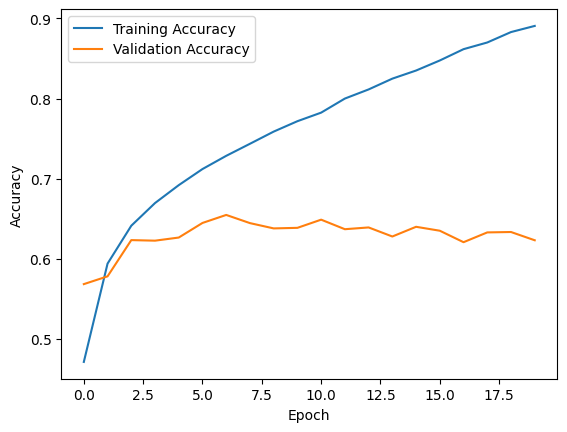

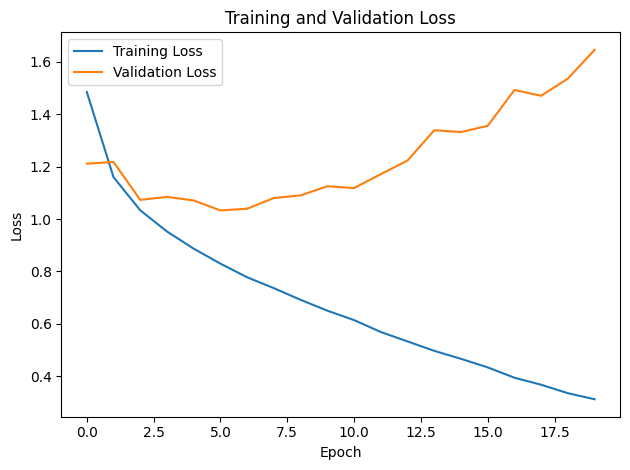

In [7]:
###training the model and plotting helper functions (accuracy and loss)

history = model1.fit(X_train, Y_train, epochs=20, validation_data=(X_test, Y_test))

# plot of training and validation (accuracy and loss)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()  
plt.show()

313/313 [==============================] - 1s 3ms/step


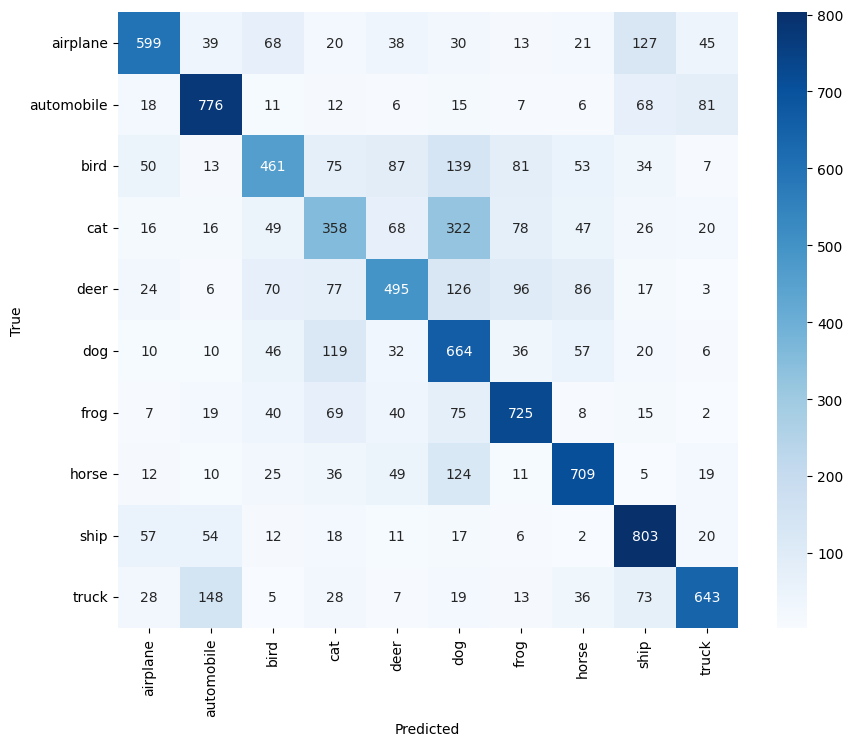

              precision    recall  f1-score   support

    airplane       0.73      0.60      0.66      1000
  automobile       0.71      0.78      0.74      1000
        bird       0.59      0.46      0.52      1000
         cat       0.44      0.36      0.40      1000
        deer       0.59      0.49      0.54      1000
         dog       0.43      0.66      0.52      1000
        frog       0.68      0.72      0.70      1000
       horse       0.69      0.71      0.70      1000
        ship       0.68      0.80      0.73      1000
       truck       0.76      0.64      0.70      1000

    accuracy                           0.62     10000
   macro avg       0.63      0.62      0.62     10000
weighted avg       0.63      0.62      0.62     10000



In [8]:
###useful metrics for model evaluation



###confusion matrix
y_pred = model1.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


###precision,recall, f1score
report = classification_report(y_true, y_pred_classes, target_names=class_names)
print(report)


In [9]:
###trying to reduce overfit, new model architecture

model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
    
])


model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 2, 2, 128)        

Epoch 1/20
1563/1563 [==============================] - 20s 13ms/step - loss: 1.6117 - accuracy: 0.4077 - val_loss: 1.2308 - val_accuracy: 0.5572
Epoch 2/20
1563/1563 [==============================] - 20s 13ms/step - loss: 1.2254 - accuracy: 0.5635 - val_loss: 1.1288 - val_accuracy: 0.6012
Epoch 3/20
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0654 - accuracy: 0.6259 - val_loss: 0.9832 - val_accuracy: 0.6554
Epoch 4/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9595 - accuracy: 0.6636 - val_loss: 0.9078 - val_accuracy: 0.6821
Epoch 5/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8847 - accuracy: 0.6918 - val_loss: 0.9447 - val_accuracy: 0.6717
Epoch 6/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8254 - accuracy: 0.7136 - val_loss: 0.8446 - val_accuracy: 0.7085
Epoch 7/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7734 - accuracy: 0.7303 - val_loss: 0.8344 -

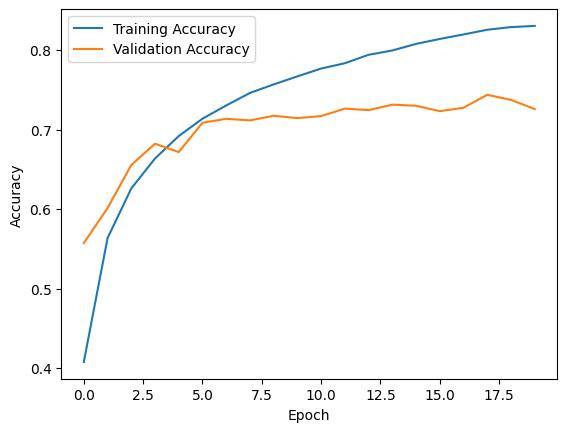

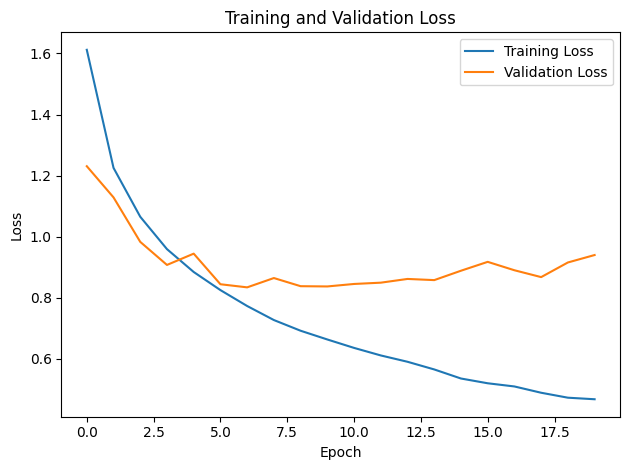

In [10]:
history = model2.fit(X_train, Y_train, epochs=20, validation_data=(X_test, Y_test))



plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout() 
plt.show()

313/313 [==============================] - 1s 5ms/step


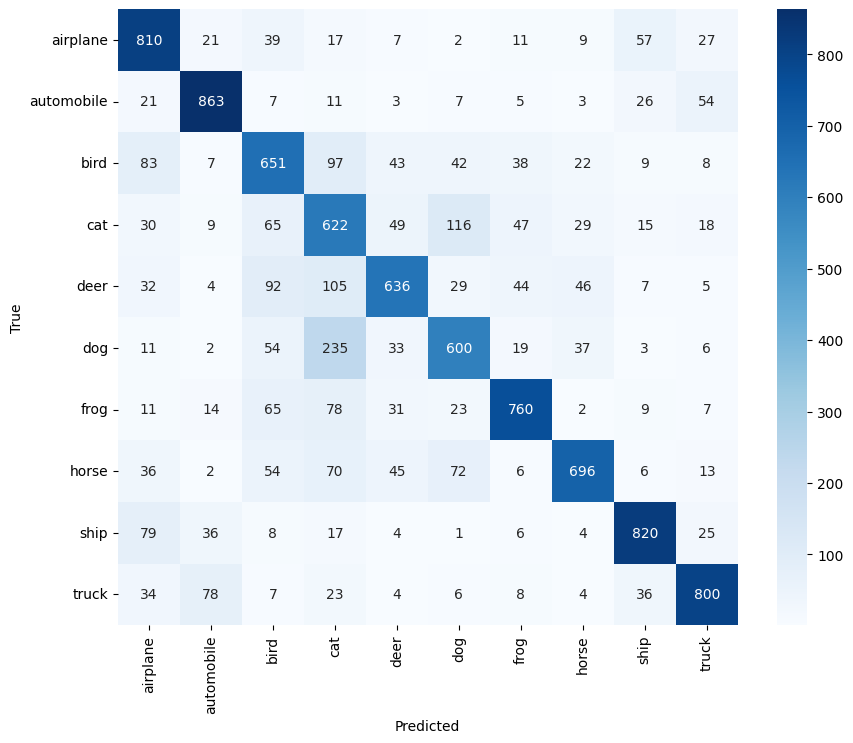

              precision    recall  f1-score   support

    airplane       0.71      0.81      0.75      1000
  automobile       0.83      0.86      0.85      1000
        bird       0.62      0.65      0.64      1000
         cat       0.49      0.62      0.55      1000
        deer       0.74      0.64      0.69      1000
         dog       0.67      0.60      0.63      1000
        frog       0.81      0.76      0.78      1000
       horse       0.82      0.70      0.75      1000
        ship       0.83      0.82      0.82      1000
       truck       0.83      0.80      0.82      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



In [11]:
###scores of model2

###confusion matrix


y_pred = model2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


###precision,recall, f1score
report = classification_report(y_true, y_pred_classes, target_names=class_names)
print(report)


In [13]:
### applying batch normalization and more Dropout layers (trying to reduce again overfit)

model3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 13, 13, 64)        256       
 chNormalization)                                                
                                                      

Epoch 1/20
1563/1563 [==============================] - 27s 16ms/step - loss: 1.8214 - accuracy: 0.3561 - val_loss: 1.4395 - val_accuracy: 0.4958
Epoch 2/20
1563/1563 [==============================] - 26s 16ms/step - loss: 1.4010 - accuracy: 0.4995 - val_loss: 1.3635 - val_accuracy: 0.4845
Epoch 3/20
1563/1563 [==============================] - 26s 17ms/step - loss: 1.2466 - accuracy: 0.5577 - val_loss: 1.1786 - val_accuracy: 0.6004
Epoch 4/20
1563/1563 [==============================] - 26s 16ms/step - loss: 1.1492 - accuracy: 0.5966 - val_loss: 1.3076 - val_accuracy: 0.5563
Epoch 5/20
1563/1563 [==============================] - 27s 17ms/step - loss: 1.0792 - accuracy: 0.6238 - val_loss: 1.0162 - val_accuracy: 0.6411
Epoch 6/20
1563/1563 [==============================] - 26s 17ms/step - loss: 1.0133 - accuracy: 0.6491 - val_loss: 0.9143 - val_accuracy: 0.6834
Epoch 7/20
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9764 - accuracy: 0.6630 - val_loss: 0.9351 -

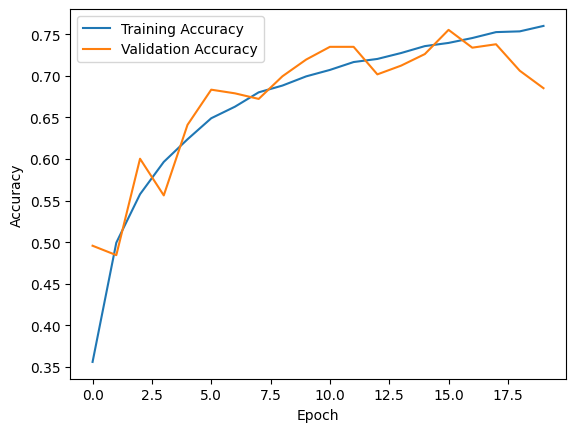

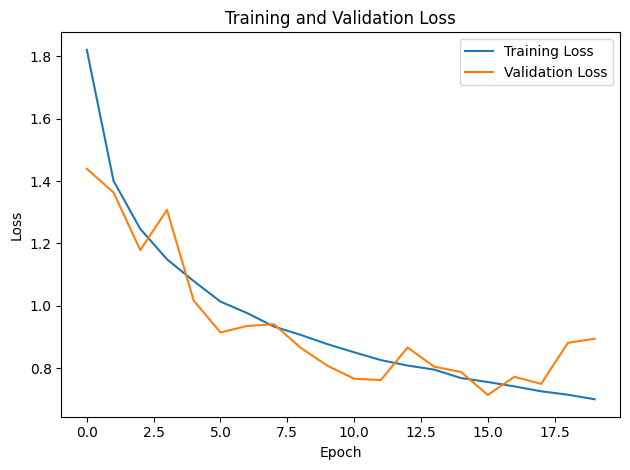

In [14]:
history = model3.fit(X_train, Y_train, epochs=20, validation_data=(X_test, Y_test))

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout() 
plt.show()

313/313 [==============================] - 2s 6ms/step


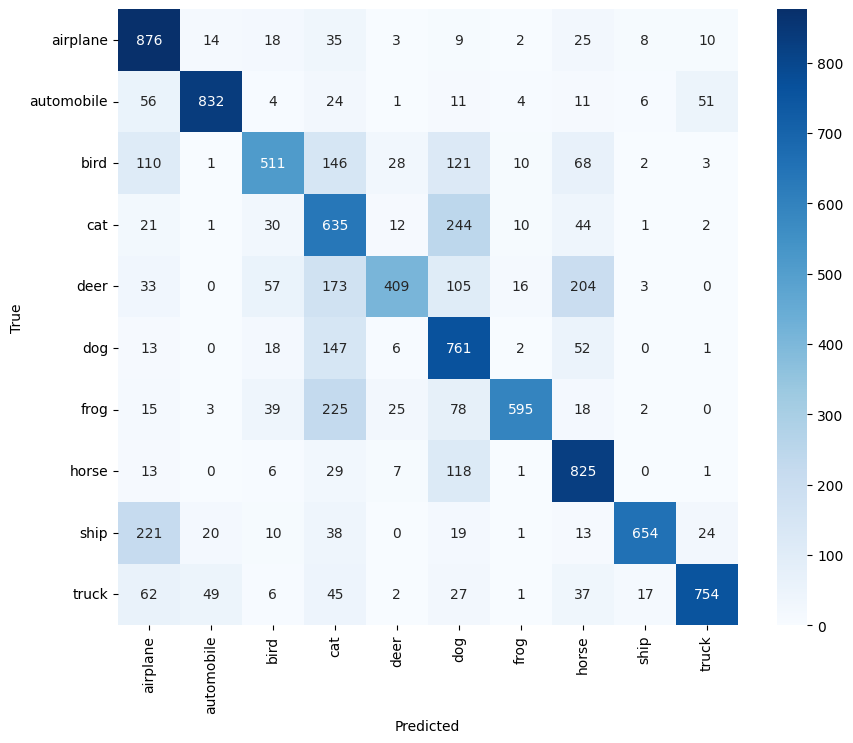

              precision    recall  f1-score   support

    airplane       0.62      0.88      0.72      1000
  automobile       0.90      0.83      0.87      1000
        bird       0.73      0.51      0.60      1000
         cat       0.42      0.64      0.51      1000
        deer       0.83      0.41      0.55      1000
         dog       0.51      0.76      0.61      1000
        frog       0.93      0.59      0.72      1000
       horse       0.64      0.82      0.72      1000
        ship       0.94      0.65      0.77      1000
       truck       0.89      0.75      0.82      1000

    accuracy                           0.69     10000
   macro avg       0.74      0.69      0.69     10000
weighted avg       0.74      0.69      0.69     10000



In [15]:
###scores of model3


y_pred = model3.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



report = classification_report(y_true, y_pred_classes, target_names=class_names)
print(report)


Epoch 21/40
1563/1563 [==============================] - 26s 16ms/step - loss: 0.6899 - accuracy: 0.7636 - val_loss: 0.7315 - val_accuracy: 0.7486
Epoch 22/40
1563/1563 [==============================] - 26s 16ms/step - loss: 0.6770 - accuracy: 0.7675 - val_loss: 0.7350 - val_accuracy: 0.7446
Epoch 23/40
1563/1563 [==============================] - 26s 16ms/step - loss: 0.6701 - accuracy: 0.7692 - val_loss: 0.7266 - val_accuracy: 0.7538
Epoch 24/40
1563/1563 [==============================] - 26s 17ms/step - loss: 0.6587 - accuracy: 0.7711 - val_loss: 0.7045 - val_accuracy: 0.7587
Epoch 25/40
1563/1563 [==============================] - 27s 17ms/step - loss: 0.6497 - accuracy: 0.7764 - val_loss: 0.7049 - val_accuracy: 0.7578
Epoch 26/40
1563/1563 [==============================] - 26s 17ms/step - loss: 0.6435 - accuracy: 0.7790 - val_loss: 0.7009 - val_accuracy: 0.7629
Epoch 27/40
1563/1563 [==============================] - 26s 17ms/step - loss: 0.6347 - accuracy: 0.7816 - val_loss: 0

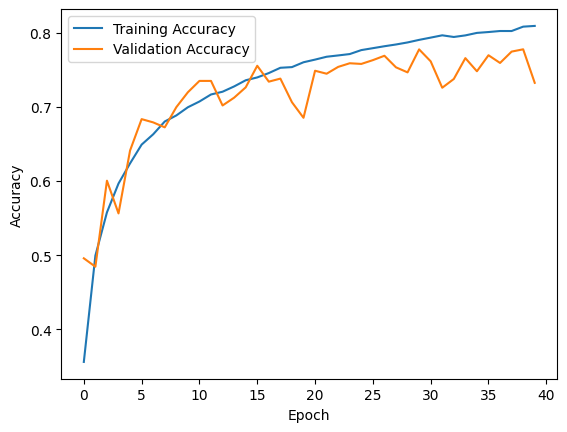

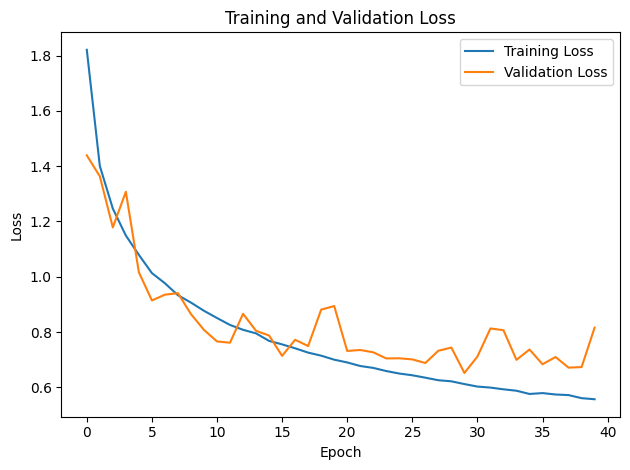

In [16]:


### adding 20 epochs for training
history_additional = model3.fit(X_train, Y_train, epochs=40, validation_data=(X_test, Y_test),
                                 initial_epoch=history.epoch[-1] + 1)

###combine data histories to plot the entire training process
combined_history = {}
for key in history.history:
    combined_history[key] = history.history[key] + history_additional.history[key]


plt.plot(combined_history['accuracy'], label='Training Accuracy')
plt.plot(combined_history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(combined_history['loss'], label='Training Loss')
plt.plot(combined_history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()  
plt.show()

313/313 [==============================] - 2s 6ms/step


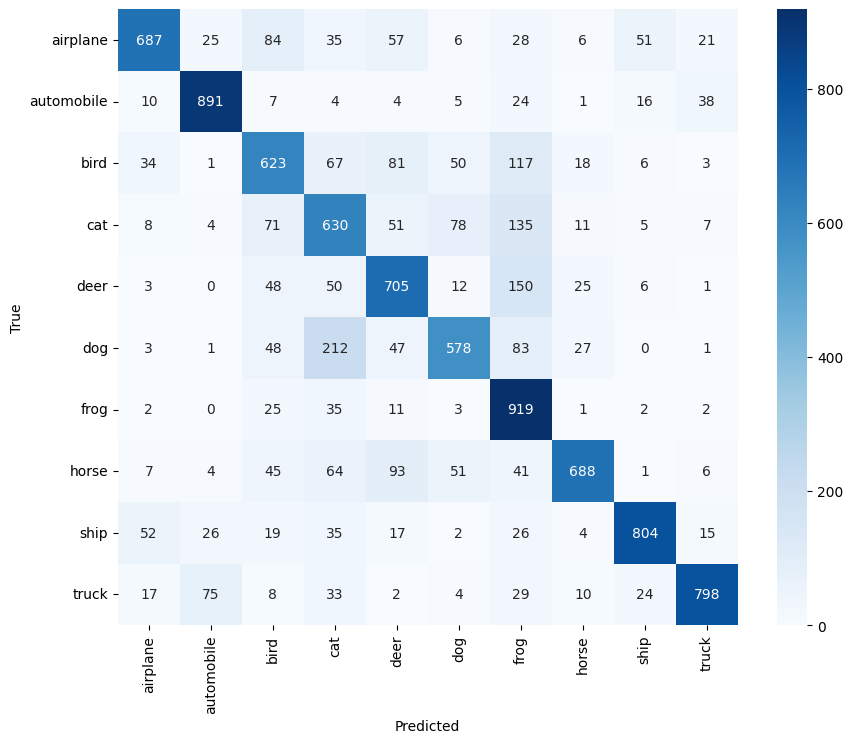

              precision    recall  f1-score   support

    airplane       0.83      0.69      0.75      1000
  automobile       0.87      0.89      0.88      1000
        bird       0.64      0.62      0.63      1000
         cat       0.54      0.63      0.58      1000
        deer       0.66      0.70      0.68      1000
         dog       0.73      0.58      0.65      1000
        frog       0.59      0.92      0.72      1000
       horse       0.87      0.69      0.77      1000
        ship       0.88      0.80      0.84      1000
       truck       0.89      0.80      0.84      1000

    accuracy                           0.73     10000
   macro avg       0.75      0.73      0.73     10000
weighted avg       0.75      0.73      0.73     10000



In [17]:


y_pred = model3.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



report = classification_report(y_true, y_pred_classes, target_names=class_names)
print(report)






In [18]:

### adding 20 epochs for training (again)

history_additional2 = model3.fit(X_train, Y_train, epochs=60, validation_data=(X_test, Y_test),
                                 initial_epoch=history_additional.epoch[-1] + 1)


combined_history = {}
for key in history_additional.history:
    combined_history[key] = history_additional.history[key] + history_additional2.history[key]


plt.plot(combined_history['accuracy'], label='Training Accuracy')
plt.plot(combined_history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(combined_history['loss'], label='Training Loss')
plt.plot(combined_history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()  
plt.show()

Epoch 41/60
1563/1563 [==============================] - 27s 17ms/step - loss: 0.5497 - accuracy: 0.8096 - val_loss: 0.8644 - val_accuracy: 0.7265
Epoch 42/60
1563/1563 [==============================] - 26s 17ms/step - loss: 0.5482 - accuracy: 0.8114 - val_loss: 0.6782 - val_accuracy: 0.7766
Epoch 43/60
1563/1563 [==============================] - 26s 17ms/step - loss: 0.5401 - accuracy: 0.8150 - val_loss: 0.6658 - val_accuracy: 0.7772
Epoch 44/60
1563/1563 [==============================] - 27s 17ms/step - loss: 0.5325 - accuracy: 0.8146 - val_loss: 0.6688 - val_accuracy: 0.7743
Epoch 45/60
1563/1563 [==============================] - 25s 16ms/step - loss: 0.5339 - accuracy: 0.8139 - val_loss: 0.6838 - val_accuracy: 0.7731
Epoch 46/60
1563/1563 [==============================] - 27s 17ms/step - loss: 0.5393 - accuracy: 0.8147 - val_loss: 0.6734 - val_accuracy: 0.7730
Epoch 47/60
1563/1563 [==============================] - 26s 17ms/step - loss: 0.5274 - accuracy: 0.8178 - val_loss: 0

NameError: name 'history_additiona' is not defined

In [26]:
###lowering the learning rate  (standard for Adam optimizer is 0.001)


model4 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model4.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_15 (Ba  (None, 30, 30, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_16 (Ba  (None, 13, 13, 64)        256       
 tchNormalization)                                               
                                                      

Epoch 1/20
1563/1563 [==============================] - 27s 17ms/step - loss: 2.5018 - accuracy: 0.2338 - val_loss: 1.7508 - val_accuracy: 0.3902
Epoch 2/20
1563/1563 [==============================] - 26s 17ms/step - loss: 1.8379 - accuracy: 0.3322 - val_loss: 1.5650 - val_accuracy: 0.4459
Epoch 3/20
1563/1563 [==============================] - 26s 17ms/step - loss: 1.6712 - accuracy: 0.3961 - val_loss: 1.4132 - val_accuracy: 0.5042
Epoch 4/20
1563/1563 [==============================] - 28s 18ms/step - loss: 1.5611 - accuracy: 0.4352 - val_loss: 1.3494 - val_accuracy: 0.5228
Epoch 5/20
1563/1563 [==============================] - 26s 17ms/step - loss: 1.4779 - accuracy: 0.4662 - val_loss: 1.2682 - val_accuracy: 0.5479
Epoch 6/20
1563/1563 [==============================] - 28s 18ms/step - loss: 1.4043 - accuracy: 0.4994 - val_loss: 1.2386 - val_accuracy: 0.5519
Epoch 7/20
1563/1563 [==============================] - 26s 17ms/step - loss: 1.3375 - accuracy: 0.5246 - val_loss: 1.1945 -

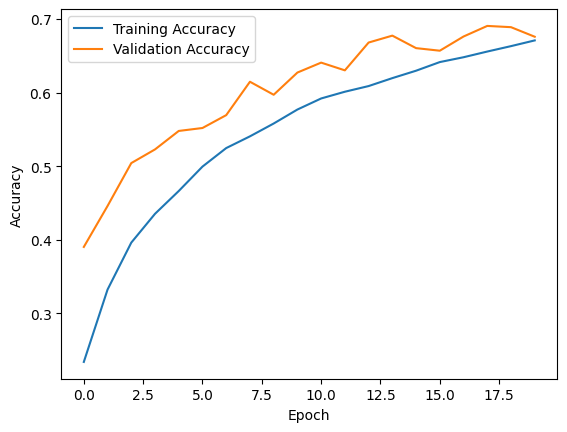

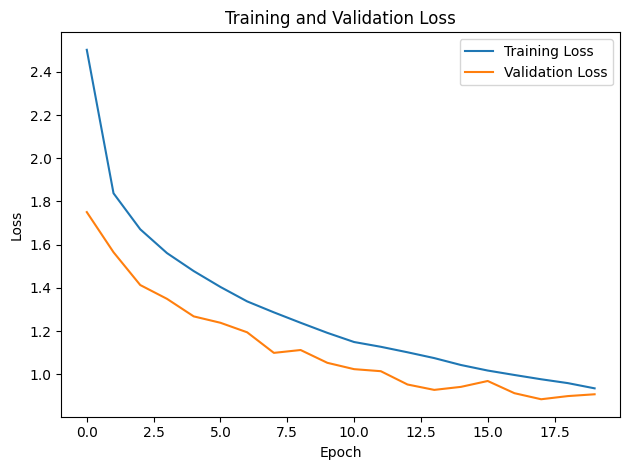

In [27]:
###training 

history = model4.fit(X_train, Y_train, epochs=20, validation_data=(X_test, Y_test))


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()  
plt.show()

Epoch 21/40
1563/1563 [==============================] - 26s 17ms/step - loss: 0.9210 - accuracy: 0.6751 - val_loss: 0.8294 - val_accuracy: 0.7095
Epoch 22/40
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8998 - accuracy: 0.6805 - val_loss: 0.8320 - val_accuracy: 0.7127
Epoch 23/40
1563/1563 [==============================] - 26s 17ms/step - loss: 0.8914 - accuracy: 0.6865 - val_loss: 0.8059 - val_accuracy: 0.7218
Epoch 24/40
1563/1563 [==============================] - 26s 16ms/step - loss: 0.8754 - accuracy: 0.6918 - val_loss: 0.8343 - val_accuracy: 0.7094
Epoch 25/40
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8597 - accuracy: 0.6968 - val_loss: 0.8074 - val_accuracy: 0.7215
Epoch 26/40
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8495 - accuracy: 0.7027 - val_loss: 0.7966 - val_accuracy: 0.7228
Epoch 27/40
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8326 - accuracy: 0.7091 - val_loss: 0

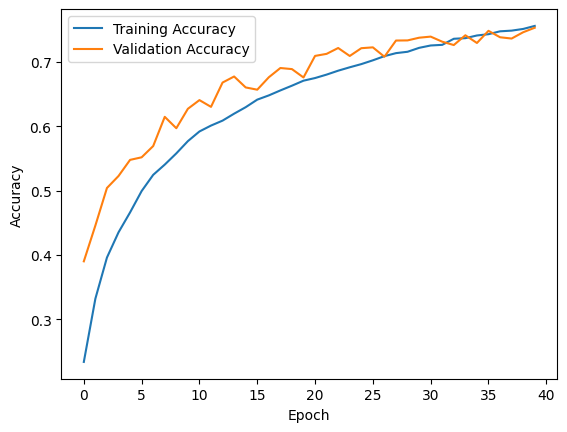

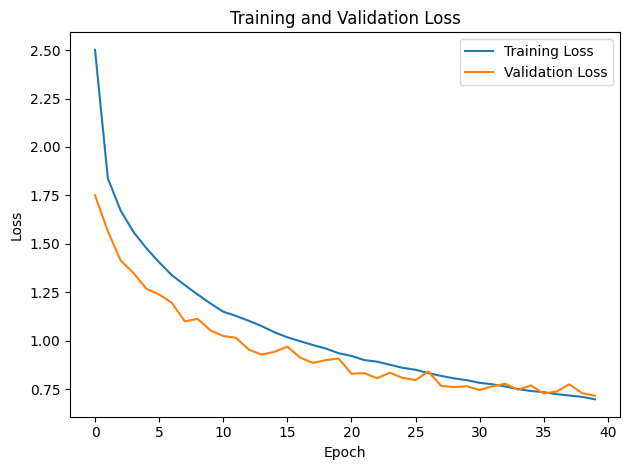

In [28]:
###adding 20 epochs of training

history_additional = model4.fit(X_train, Y_train, epochs=40, validation_data=(X_test, Y_test),
                                 initial_epoch=history.epoch[-1] + 1)


combined_history = {}
for key in history.history:
    combined_history[key] = history.history[key] + history_additional.history[key]


plt.plot(combined_history['accuracy'], label='Training Accuracy')
plt.plot(combined_history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(combined_history['loss'], label='Training Loss')
plt.plot(combined_history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()  
plt.show()

Epoch 41/60
1563/1563 [==============================] - 26s 16ms/step - loss: 0.6978 - accuracy: 0.7553 - val_loss: 0.7200 - val_accuracy: 0.7551
Epoch 42/60
1563/1563 [==============================] - 26s 17ms/step - loss: 0.6855 - accuracy: 0.7594 - val_loss: 0.7990 - val_accuracy: 0.7200
Epoch 43/60
1563/1563 [==============================] - 26s 16ms/step - loss: 0.6718 - accuracy: 0.7650 - val_loss: 0.7550 - val_accuracy: 0.7409
Epoch 44/60
1563/1563 [==============================] - 26s 16ms/step - loss: 0.6715 - accuracy: 0.7665 - val_loss: 0.7650 - val_accuracy: 0.7313
Epoch 45/60
1563/1563 [==============================] - 27s 17ms/step - loss: 0.6633 - accuracy: 0.7688 - val_loss: 0.7015 - val_accuracy: 0.7548
Epoch 46/60
1563/1563 [==============================] - 26s 16ms/step - loss: 0.6593 - accuracy: 0.7699 - val_loss: 0.6910 - val_accuracy: 0.7588
Epoch 47/60
1563/1563 [==============================] - 26s 17ms/step - loss: 0.6471 - accuracy: 0.7742 - val_loss: 0

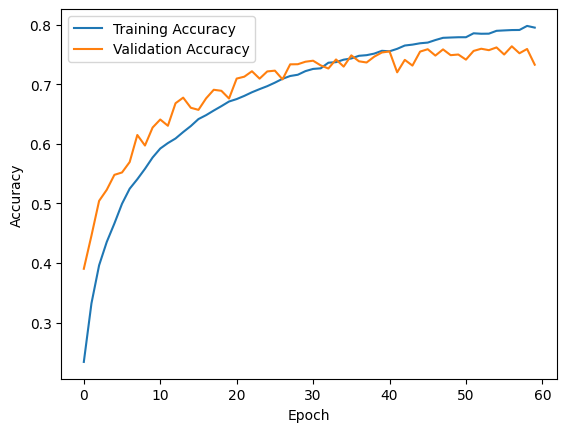

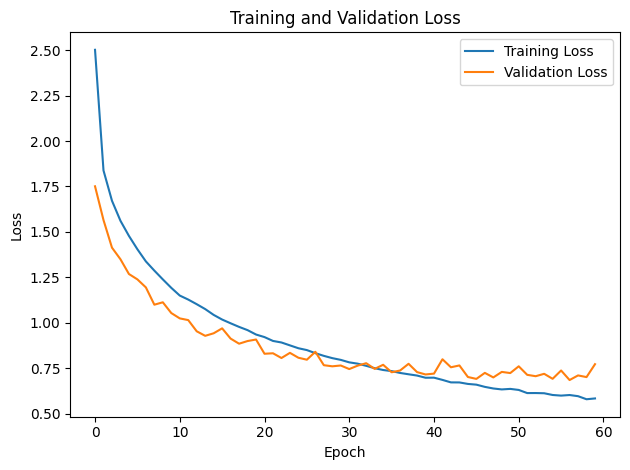

In [29]:
# 3rd training session (20 epochs again)
history_add2 = model4.fit(X_train, Y_train, epochs=60, validation_data=(X_test, Y_test),
                          initial_epoch=history_additional.epoch[-1] + 1)


combined_history = {}
for key in history.history:
    combined_history[key] = history.history[key] + history_additional.history[key] + history_add2.history[key]


plt.plot(combined_history['accuracy'], label='Training Accuracy')
plt.plot(combined_history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(combined_history['loss'], label='Training Loss')
plt.plot(combined_history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()  
plt.show()


Epoch 61/80
1563/1563 [==============================] - 27s 17ms/step - loss: 0.5171 - accuracy: 0.8202 - val_loss: 0.7210 - val_accuracy: 0.7580
Epoch 62/80
1563/1563 [==============================] - 27s 17ms/step - loss: 0.5191 - accuracy: 0.8192 - val_loss: 0.7053 - val_accuracy: 0.7627
Epoch 63/80
1563/1563 [==============================] - 27s 17ms/step - loss: 0.5101 - accuracy: 0.8206 - val_loss: 0.7016 - val_accuracy: 0.7654
Epoch 64/80
1563/1563 [==============================] - 27s 17ms/step - loss: 0.5215 - accuracy: 0.8185 - val_loss: 0.7238 - val_accuracy: 0.7551
Epoch 65/80
1563/1563 [==============================] - 26s 17ms/step - loss: 0.5136 - accuracy: 0.8208 - val_loss: 0.7197 - val_accuracy: 0.7605
Epoch 66/80
1563/1563 [==============================] - 27s 17ms/step - loss: 0.5054 - accuracy: 0.8233 - val_loss: 0.7060 - val_accuracy: 0.7637
Epoch 67/80
1563/1563 [==============================] - 27s 17ms/step - loss: 0.5059 - accuracy: 0.8228 - val_loss: 0

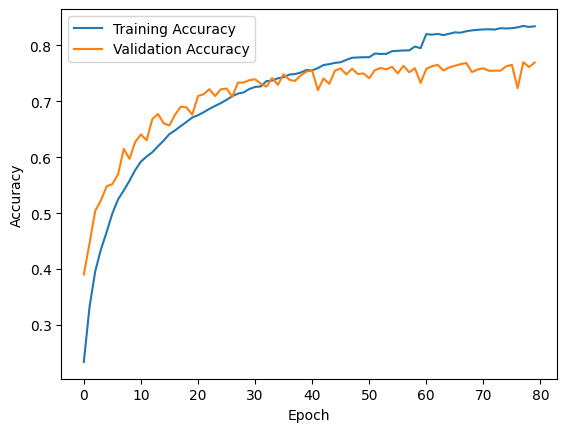

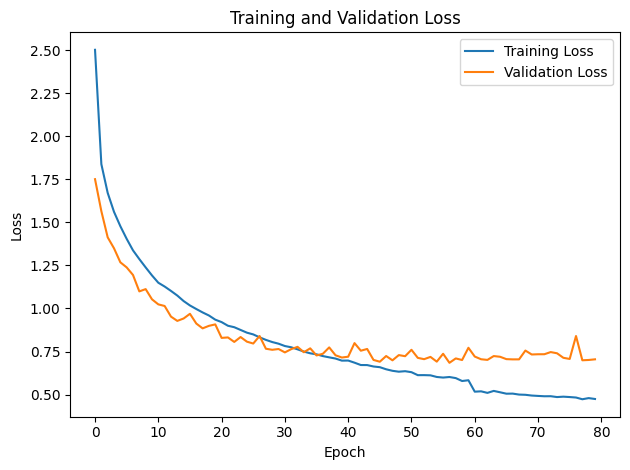

In [31]:
# 4th training session
history_add3 = model4.fit(X_train, Y_train, epochs=80, validation_data=(X_test, Y_test),
                          initial_epoch=history_add2.epoch[-1] + 1)


combined_history = {}
for key in history.history:
    combined_history[key] = history.history[key] + history_additional.history[key] + history_add2.history[key]+history_add3.history[key]


plt.plot(combined_history['accuracy'], label='Training Accuracy')
plt.plot(combined_history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(combined_history['loss'], label='Training Loss')
plt.plot(combined_history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout() 
plt.show()

313/313 [==============================] - 2s 6ms/step


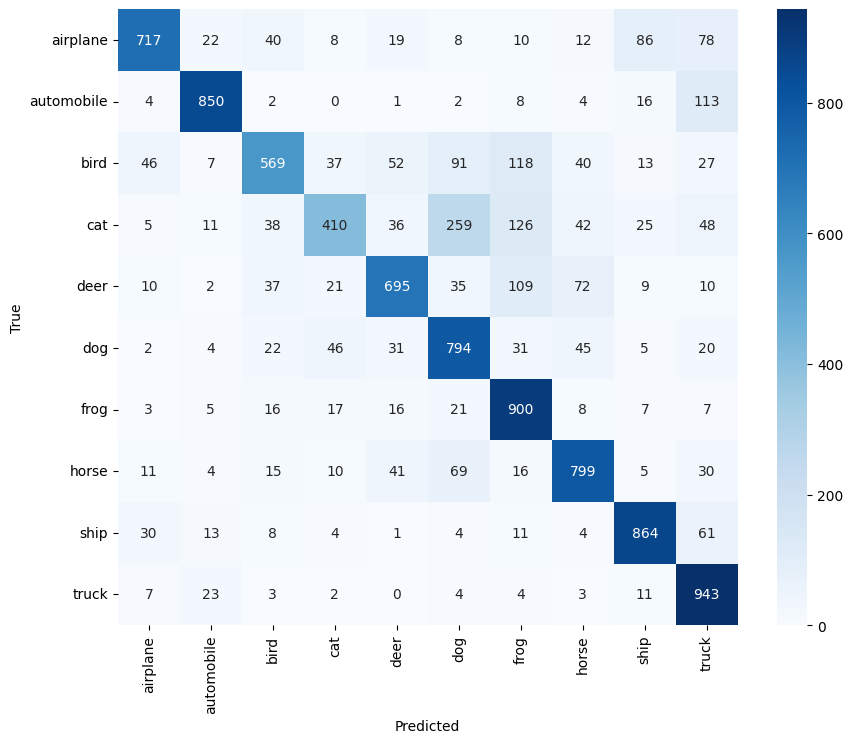

              precision    recall  f1-score   support

    airplane       0.86      0.72      0.78      1000
  automobile       0.90      0.85      0.88      1000
        bird       0.76      0.57      0.65      1000
         cat       0.74      0.41      0.53      1000
        deer       0.78      0.69      0.73      1000
         dog       0.62      0.79      0.69      1000
        frog       0.68      0.90      0.77      1000
       horse       0.78      0.80      0.79      1000
        ship       0.83      0.86      0.85      1000
       truck       0.71      0.94      0.81      1000

    accuracy                           0.75     10000
   macro avg       0.76      0.75      0.75     10000
weighted avg       0.76      0.75      0.75     10000



In [52]:
###scores of model 4

y_pred = model4.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


###precision,recall, f1score
report = classification_report(y_true, y_pred_classes, target_names=class_names)
print(report)

313/313 [==============================] - 2s 6ms/step


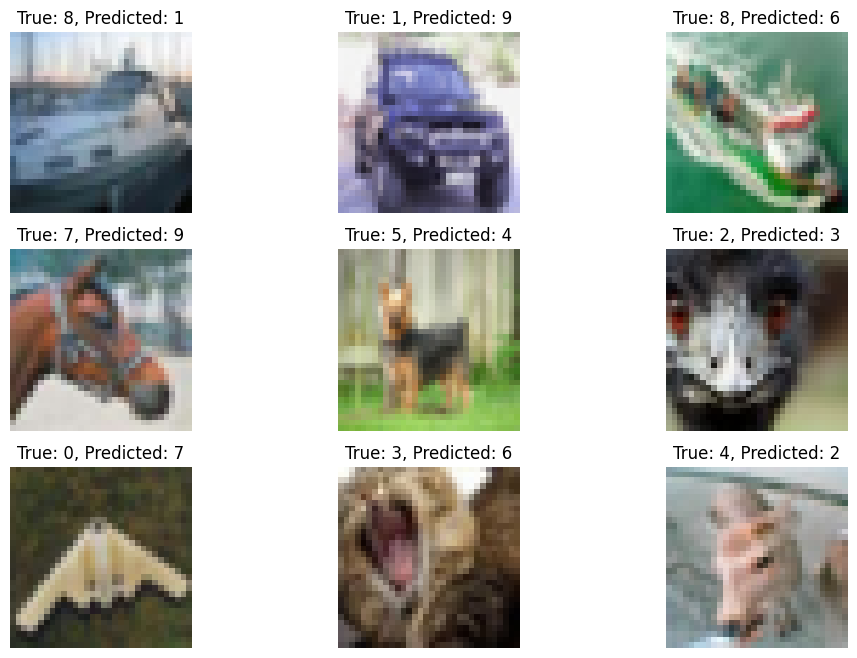

In [54]:
###plot some misclassified images


predictions = model4.predict(X_test)
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(Y_test, axis=1)


misclassified_indices = np.where(y_pred != y_true)[0]


plt.figure(figsize=(12, 8))
for i, idx in enumerate(misclassified_indices[:9]):  
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[idx])
    plt.title(f"True: {y_true[idx]}, Predicted: {y_pred[idx]}")
    plt.axis('off')
plt.show()

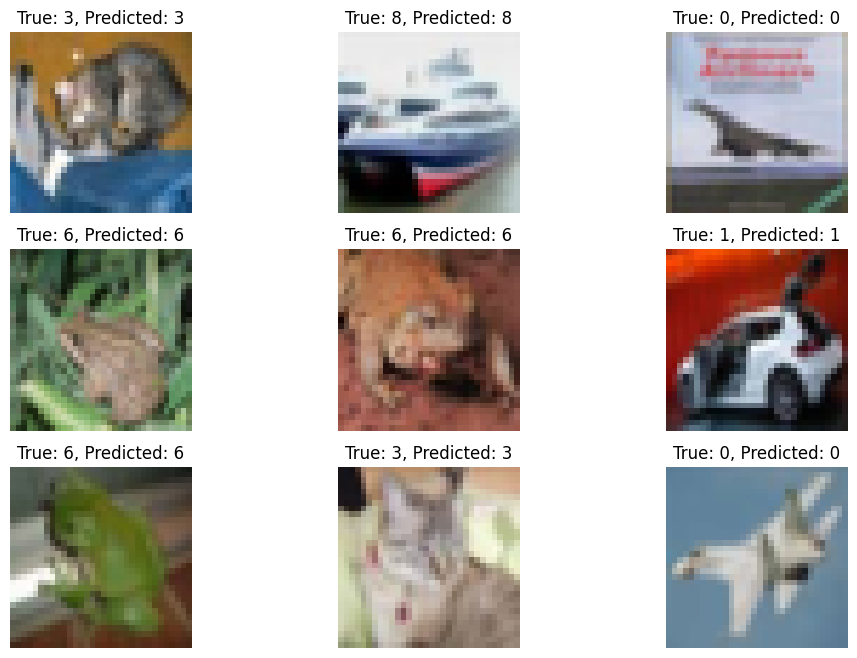

In [57]:
###plot some correctly classified images

classified_indices = np.where(y_pred == y_true)[0]


plt.figure(figsize=(12, 8))
for i, idx in enumerate(classified_indices[:9]):  
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[idx])
    plt.title(f"True: {y_true[idx]}, Predicted: {y_pred[idx]}")
    plt.axis('off')
plt.show()

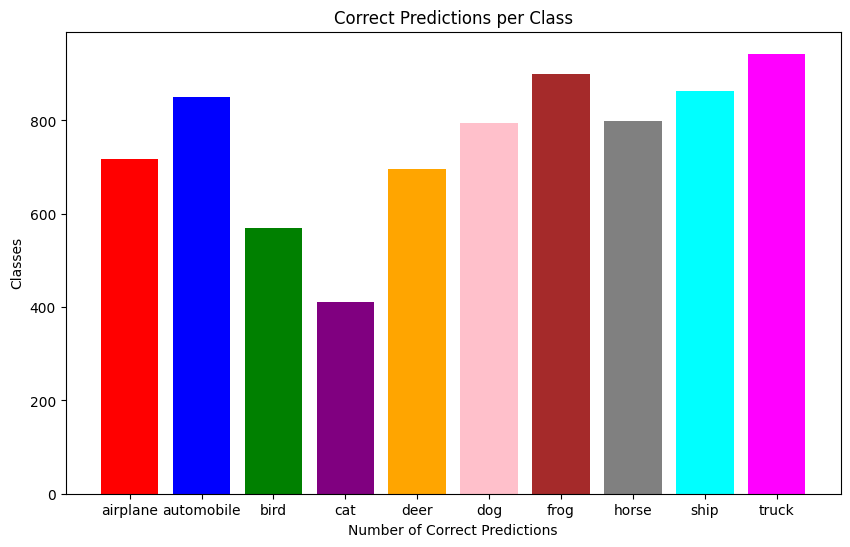

<Figure size 640x480 with 0 Axes>

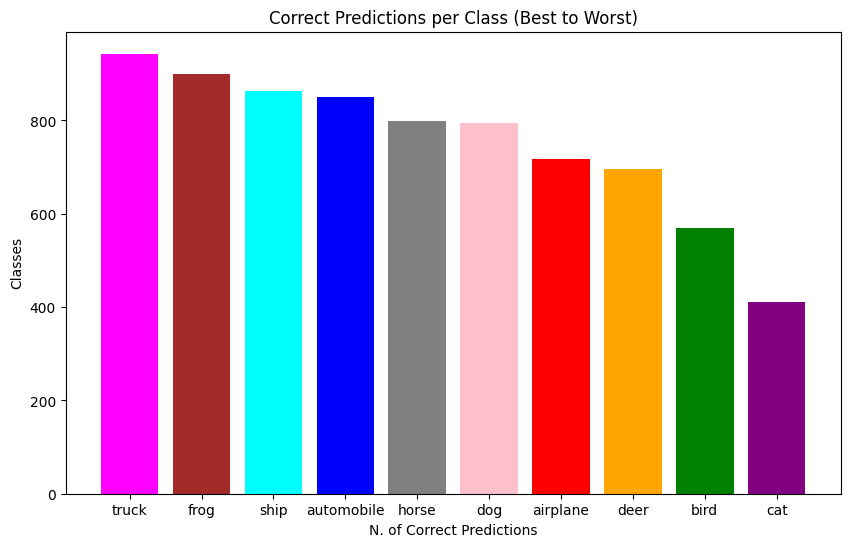

In [70]:
###data visualization of correct classifications

correct_predictions = np.zeros(10)
correctly_indices = np.where(y_pred == y_true)[0]


for class_index in range(10):
    class_indices = np.where(y_true[correctly_indices] == class_index)[0]
    correct_predictions[class_index] = len(class_indices)



###correctly classified images (in numbers)

plt.figure(figsize=(10, 6))
plt.bar(class_names, correct_predictions, color=colors)
plt.xlabel('Number of Correct Predictions')
plt.ylabel('Classes')
plt.title('Correct Predictions per Class')
 
plt.show()

plt.tight_layout()


###best to wors class (in numbers of prediction)

sorted_indices = np.argsort(-correct_predictions)
sorted_class_labels = [class_names[i] for i in sorted_indices]
sorted_correct_predictions = correct_predictions[sorted_indices]
sorted_colors = [colors[i] for i in sorted_indices]


plt.figure(figsize=(10, 6))
plt.bar(sorted_class_labels, sorted_correct_predictions, color=sorted_colors)
plt.xlabel('N. of Correct Predictions')
plt.ylabel('Classes')
plt.title('Correct Predictions per Class (Best to Worst)')

plt.show()








In [71]:
model4.save('CNN-model for Cifar10')

INFO:tensorflow:Assets written to: CNN-model for Cifar10\assets


INFO:tensorflow:Assets written to: CNN-model for Cifar10\assets
